In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()

y[digits.target==9] = 1
y[digits.target!=9] = 0

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=500)

In [2]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_log_predict = log_reg.predict(X_test)

/Users/twu/.pyenv/versions/anaconda3-5.2.0/envs/datascience/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [3]:
from sklearn.metrics import f1_score

f1_score(y_test, y_log_predict)

0.8500000000000001

In [4]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_log_predict)

array([[404,   5],
       [  7,  34]])

In [5]:
from sklearn.metrics import precision_score

precision_score(y_test, y_log_predict)

0.8717948717948718

In [6]:
from sklearn.metrics import recall_score

recall_score(y_test, y_log_predict)

0.8292682926829268

In [7]:
log_reg.decision_function(X_test)

array([-3.86921936e+01, -2.91916753e+01, -1.75035595e+01, -1.79197894e+01,
       -5.32944836e+01, -1.08165258e+01, -1.13396307e+01, -1.11402441e+01,
       -2.68077937e+01,  4.13804386e+00, -7.60968315e+00,  1.25043279e+01,
       -1.04582218e+01, -1.40021178e+01, -1.11475508e+01, -4.66242136e+01,
       -4.57501545e+01, -1.55235734e+01,  6.68327333e+00, -1.00736236e+01,
       -1.80863438e+01, -1.52734281e+01, -1.25588480e+00,  8.04508792e+00,
       -5.90737651e+01, -4.92585666e+01, -2.23394635e+00, -1.09917242e+01,
       -7.26835575e+00, -1.22277672e+01,  7.33761965e+00, -1.63070426e+01,
       -1.40075841e+01, -2.03505364e+01, -3.42299834e+01, -4.62546568e+01,
       -1.78922339e+01, -4.97938787e+00,  5.13281390e+00, -2.02515353e+01,
       -2.25933930e+01, -1.50813557e+01, -1.37179622e+01, -4.85781824e+01,
       -2.44237154e+01, -1.26640158e+01,  1.02419379e+01, -2.12384491e+01,
       -9.89279083e+00, -1.62006174e+01, -7.80310887e+01, -3.50914185e+01,
       -5.28850606e+00, -

In [8]:
log_reg.decision_function(X_test[:5])

array([-38.69219361, -29.19167525, -17.50355948, -17.91978944,
       -53.2944836 ])

In [9]:
log_reg.predict(X_test)[:5]

array([0, 0, 0, 0, 0])

In [10]:
decision_scores = log_reg.decision_function(X_test)

In [11]:
np.min(decision_scores)

-78.03108867528312

In [12]:
np.max(decision_scores)

12.748128383617177

In [13]:
y_log_predict_2 = np.array(decision_scores >= 5, dtype='int')

In [14]:
confusion_matrix(y_test, y_log_predict_2)

array([[409,   0],
       [ 16,  25]])

In [15]:
precision_score(y_test, y_log_predict_2)

1.0

In [16]:
recall_score(y_test, y_log_predict_2)

0.6097560975609756

In [17]:
y_log_predict_3 = np.array(decision_scores >= -5, dtype='int')

In [18]:
confusion_matrix(y_test, y_log_predict_3)

array([[387,  22],
       [  2,  39]])

In [19]:
precision_score(y_test, y_log_predict_3)

0.639344262295082

In [20]:
recall_score(y_test, y_log_predict_3)

0.9512195121951219

# Precision-Recall Curve

In [21]:
precisions = []
recalls = []
thresholds = np.arange(np.min(decision_scores), np.max(decision_scores), 0.1)

for threshold in thresholds:
    y_predict = np.array(decision_scores >= threshold, dtype='int')
    precisions.append(precision_score(y_test, y_predict))
    recalls.append(recall_score(y_test, y_predict))

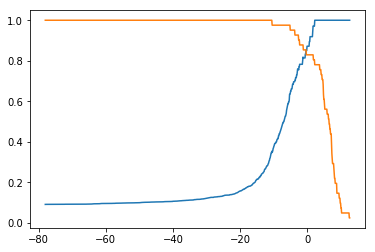

In [22]:
plt.plot(thresholds, precisions)
plt.plot(thresholds, recalls)

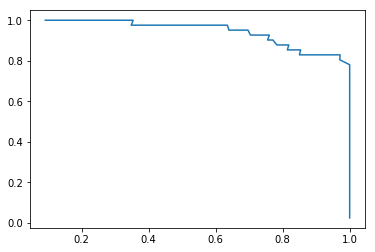

In [23]:
plt.plot(precisions, recalls)

# Precision-Recall Curve in Scikit Learn

In [24]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, decision_scores)

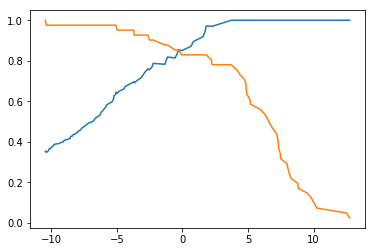

In [25]:
plt.plot(thresholds, precisions[:-1])
plt.plot(thresholds, recalls[:-1])

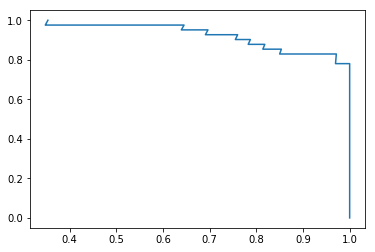

In [26]:
plt.plot(precisions, recalls)